In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')

In [3]:
vdg = pd.read_csv('vgsales.csv', sep=',')
vdg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [21]:
vdg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [20]:
vdg.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [26]:
#droped the null values
vdg=vdg.dropna()

In [27]:
vdg

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


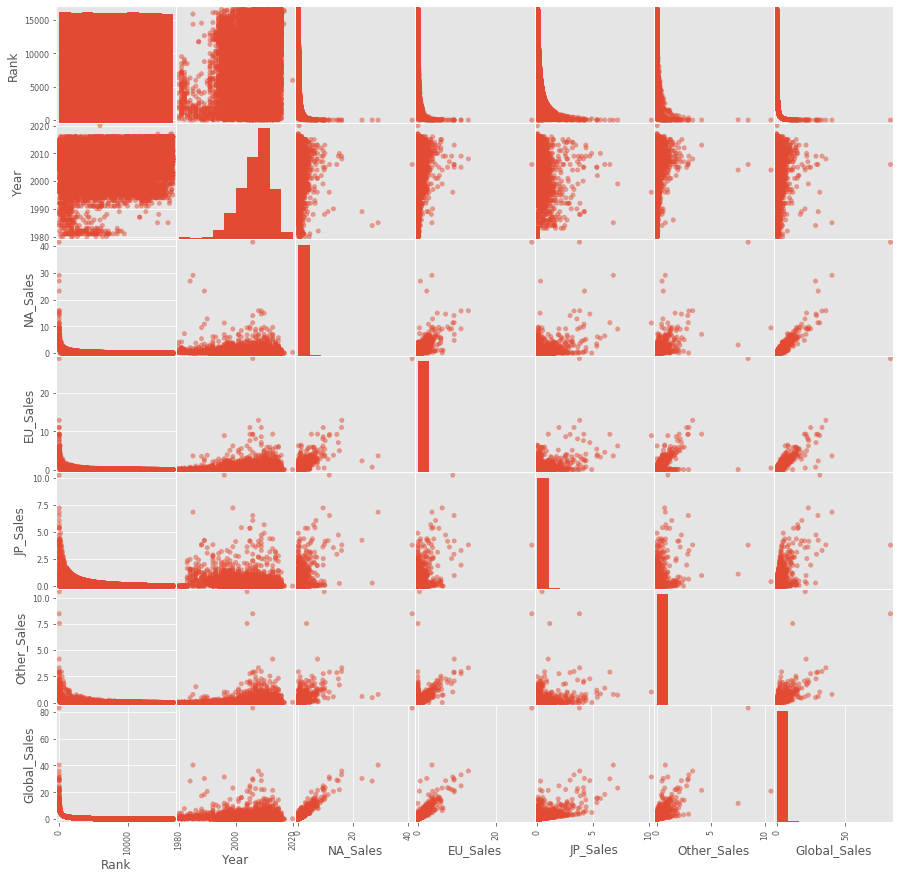

In [28]:
scatter_matrix(vdg, figsize=(15, 15), s=100)
plt.show()

In [37]:
vdg.groupby('Year')['Year'].count()

Year
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     744
2005.0     936
2006.0    1008
2007.0    1201
2008.0    1428
2009.0    1431
2010.0    1257
2011.0    1136
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
2020.0       1
Name: Year, dtype: int64

In [41]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "b", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

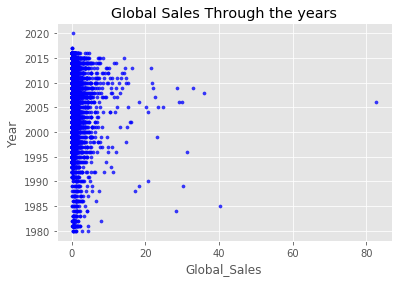

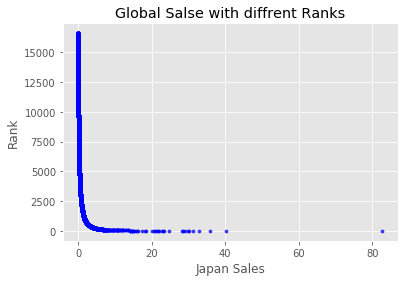

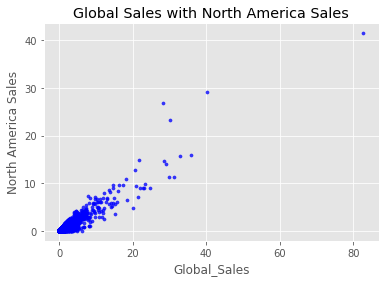

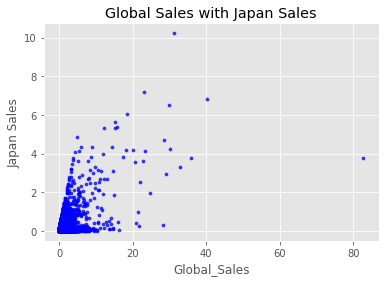

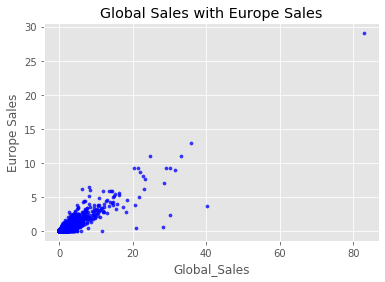

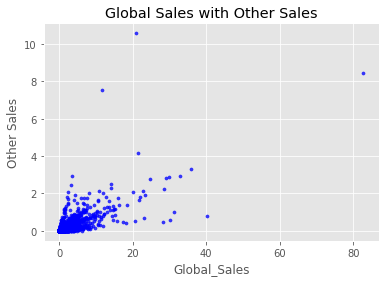

In [48]:

scatterplot(vdg['Global_Sales'],vdg['Year'],'Global_Sales','Year','Global Sales Through the years')
scatterplot(vdg['Global_Sales'],vdg['Rank'],'Japan Sales','Rank','Global Salse with diffrent Ranks')
scatterplot(vdg['Global_Sales'],vdg['NA_Sales'],'Global_Sales','North America Sales','Global Sales with North America Sales')
scatterplot(vdg['Global_Sales'],vdg['JP_Sales'],'Global_Sales','Japan Sales','Global Sales with Japan Sales')
scatterplot(vdg['Global_Sales'],vdg['EU_Sales'],'Global_Sales','Europe Sales','Global Sales with Europe Sales')
scatterplot(vdg['Global_Sales'],vdg['Other_Sales'],'Global_Sales','Other Sales','Global Sales with Other Sales')

In [53]:
X = vdg['Global_Sales'].values.reshape(-1,1)
y = vdg['NA_Sales'].values.reshape(-1,1)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [72]:
from sklearn.feature_selection import f_regression as reg

In [78]:
y = np.ravel(y)

In [79]:
reg(X,y)

(array([126581.59543898]), array([0.]))

In [80]:
import statsmodels.api as sm

In [81]:
linear_model = LinearRegression()  
linear_model.fit(X_train, y_train).summary() #training the algorithm

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [62]:
#To retrieve the intercept:
print(linear_model.intercept_)
#For retrieving the slope:
print(linear_model.coef_)

[0.00096655]
[[0.48725626]]


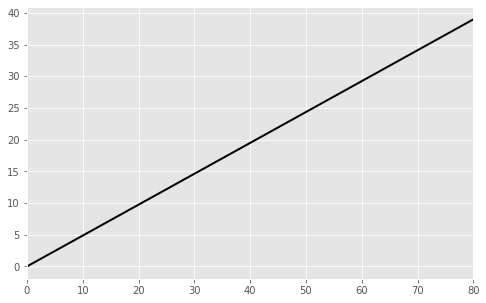

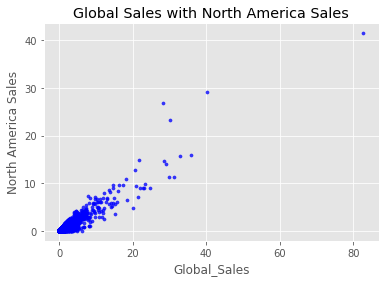

In [66]:
fig, ax = plt.subplots(figsize=(8, 5))

#make_vdg_scatter_plot(ax)
scatterplot(vdg['Global_Sales'],vdg['NA_Sales'],'Global_Sales','North America Sales','Global Sales with North America Sales')
ax
# Make a line graph of the predictions.
def make_vdg_model_line(ax, label="Linear Regression"):
    x = np.linspace(0, 80, num=250)
    ax.plot(x, linear_model.intercept_ + linear_model.coef_[0] * x,
           linewidth=2, c="black", label=label)
    ax.set_xlim(0, 80)

make_vdg_model_line(ax)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df